In [3]:
pip install numpy pandas seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Step 1: Import Libraries
# -------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Step 2: Load Dataset
# -------------------------------
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['target_name'] = df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


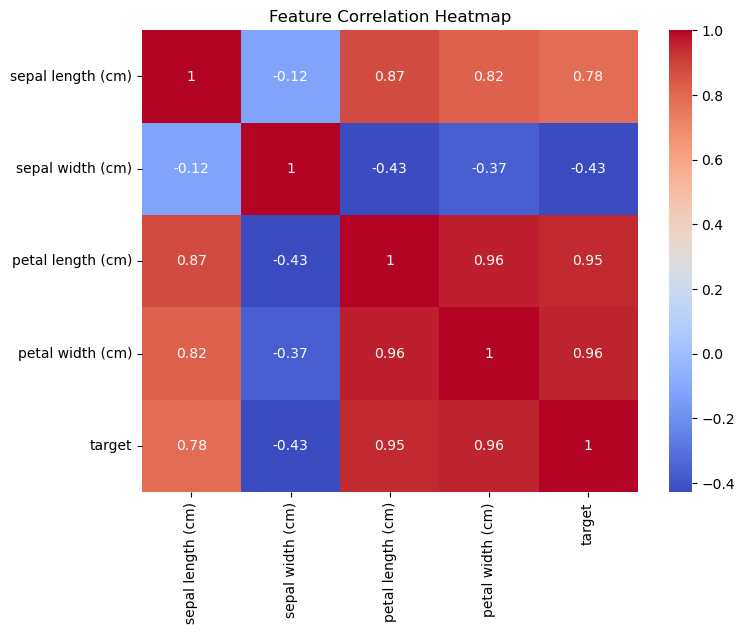

In [7]:
# Correlation heatmap (only numeric columns)
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=["target_name"]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:

# Step 4: Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# -------------

In [9]:
# Step 5: Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Step 6: Model Training
# -------------------------------

# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [11]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [12]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


In [ ]:
# Step 7: Evaluation Function

def evaluate_model(y_true, y_pred, model_name):
    print(f"📌 {model_name} Results")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=iris.target_names))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues",
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

📌 Logistic Regression Results
Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



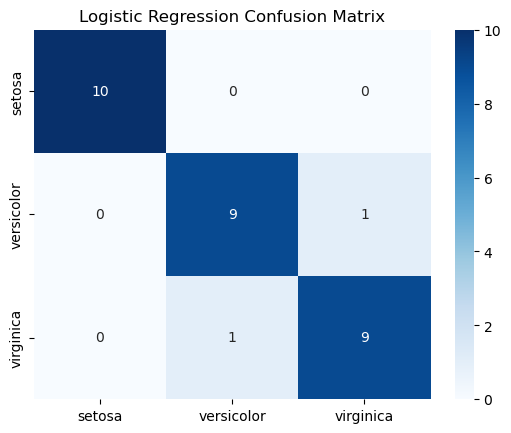

In [14]:
# Logistic Regression
evaluate_model(y_test, y_pred_log, "Logistic Regression")

📌 Decision Tree Results
Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



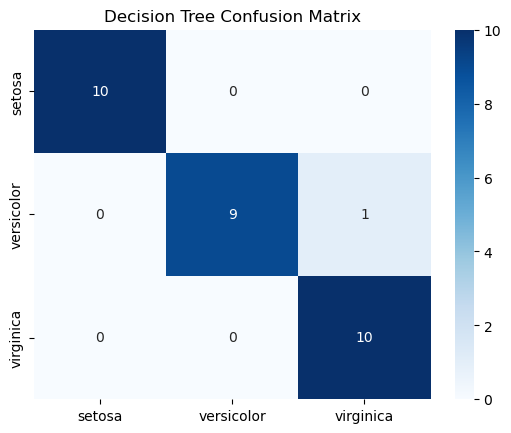

In [15]:
# Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree")

📌 KNN Results
Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



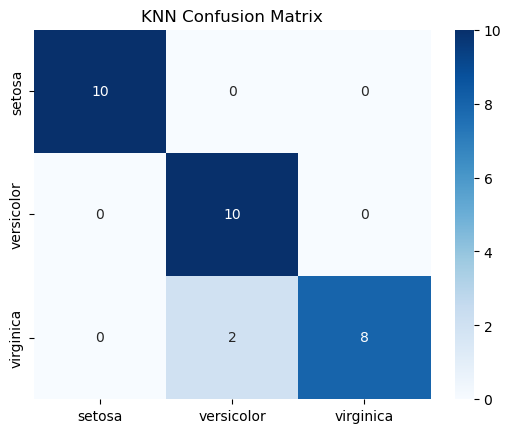

In [16]:
# KNN
evaluate_model(y_test, y_pred_knn, "KNN")